In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [67]:
allFacilities = pd.read_csv("output/describeNetwork.csv", dtype={'primary_naics': object})
naics = pd.read_csv("data/naics.csv", dtype={'2012 NAICS US Code': object})

In [68]:
len(allFacilities)

387

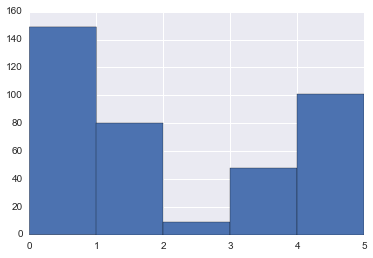

In [69]:
# Count total facilities per community
allFacilities['Community'].hist(bins=[0,1,2,3,4,5])

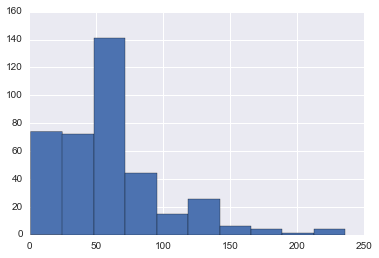

In [70]:
allFacilities['Degrees'].hist()

In [71]:
naics = naics.drop(naics.columns[[0,3,4]], axis=1)
naics.columns = ["naics", "industry"]

In [72]:
naics[naics['naics'].str.len()==6]

,naics,industry
5,111110,Soybean Farming
7,111120,Oilseed (except Soybean) Farming
9,111130,Dry Pea and Bean Farming
11,111140,Wheat Farming
13,111150,Corn Farming
15,111160,Rice Farming
17,111191,Oilseed and Grain Combination Farming
18,111199,All Other Grain Farming
21,111211,Potato Farming
22,111219,Other Vegetable (except Potato) and Melon Farm...


In [73]:
# toggle on/off depending on if you want 3-digit naics code or full
allFacilities["naicsLink"] = allFacilities['primary_naics'].str[:4]

In [74]:
allFacilities = allFacilities.merge(naics, left_on=["naicsLink"], right_on="naics", how="left")
allFacilities = allFacilities.drop("naics", axis=1)

In [75]:
# allFacilities.to_csv('output/facilitiesWithNaics.csv')

In [76]:
# this makes dict of DFs, which are written to indivual .csv files
communities = defaultdict(dict)

for i in allFacilities['Community'].unique():
    commData = allFacilities[allFacilities['Community']==i]
    communities[i]['ungroupedData'] = commData
    industries = commData.groupby(['naicsLink', 'industry']).size().order(ascending=False)
    industries = industries.reset_index()
    industries = industries.rename(columns = {0:'countPerComm'})
    industries['percentPerComm'] = (industries['countPerComm'] / len(commData))*100
    communities[i]['groupedData'] = industries

/Users/afair/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: order is deprecated, use sort_values(...)


In [77]:
# for i in communities:
#     communities[i]['groupedData'].to_csv('output/community{}.csv'.format(i))

In [78]:
# this does pretty much same as above, except writes to one master DF and .csv rather than separate files
commDict = {}

for i in allFacilities['Community'].unique():
    commData = allFacilities[allFacilities['Community']==i]
    industries = commData.groupby(['naicsLink', 'industry']).size().order(ascending=False)
    industries = industries.reset_index()
    industries = industries.rename(columns = {0:'countPerComm'})
    industries['percentPerComm'] = (industries['countPerComm'] / len(commData))*100
    industries['community'] = i
    commDict[i] = industries

/Users/afair/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


In [79]:
commDF = pd.concat([commDict[f] for f in commDict])
cols = commDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
commDF = commDF[cols]
commDF = commDF.reset_index(drop=True)

In [80]:
# commDF.to_csv('output/allCommunities.csv')

In [81]:
# print top n industries for each community
n = 5
commDF.groupby('community').head(n)

,community,naicsLink,industry,countPerComm,percentPerComm
0,0,3251,Basic Chemical Manufacturing,18,12.080537
1,0,2211,"Electric Power Generation, Transmission and Di...",13,8.724832
2,0,3328,"Coating, Engraving, Heat Treating, and Allied ...",11,7.382550
3,0,3344,Semiconductor and Other Electronic Component M...,10,6.711409
4,0,3314,Nonferrous Metal (except Aluminum) Production ...,7,4.697987
49,1,4247,Petroleum and Petroleum Products Merchant Whol...,26,32.500000
50,1,3252,"Resin, Synthetic Rubber, and Artificial Synthe...",5,6.250000
51,1,3261,Plastics Product Manufacturing,5,6.250000
52,1,4931,Warehousing and Storage,4,5.000000
53,1,3251,Basic Chemical Manufacturing,4,5.000000


In [82]:
# change community! (0-5)
community = 1

colsToDrop = ['Unnamed: 0','naicsLink', 'Betweeness', 'Closeness', 'Eigenvector']
community_table = allFacilities[allFacilities['Community']==community].drop(colsToDrop, axis=1)
community_table.columns = map(str.lower, community_table.columns)
community_table

,facility,degrees,clustering coefficient,tri_facility_id,primary_naics,parent_company_name,chemicals,community,industry
3,NORLITE LLC,225,0.243294,12047NRLTC628SO,327992,TRADEBE ENVIRONMENTAL SERVICES LLC,"['1,1,1-TRICHLOROETHANE', '1,1,2,2-TETRACHLORO...",1,Other Nonmetallic Mineral Product Manufacturing
5,BUCKEYE TERMINALS LLC - RENSSELAER TERMINAL,188,0.399932,12144MRDHS367AM,493190,BUCKEYE TERMINALS LLC,"['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'BENZO(G...",1,Warehousing and Storage
8,NORTHVILLE INDUSTRIES CORP - SETAUKET TERMINAL,167,0.437126,11733NRTHV19TER,424710,NIC HOLDING CORP,"['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'CYCLOHE...",1,Petroleum and Petroleum Products Merchant Whol...
10,TONAWANDA COKE CORP,162,0.451192,14150TNWND3875R,324199,NaN,"['ANTHRACENE', 'BENZENE', 'BENZO(G,H,I)PERYLEN...",1,Petroleum and Coal Products Manufacturing
21,UNITED RIVERHEAD TERMINAL INC,130,0.564699,11901TSCCR212SO,424710,UNITED REFINING CORP,"['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'ETHYLBE...",1,Petroleum and Petroleum Products Merchant Whol...
24,GLOBAL COS LLC NORTH TERMINAL,128,0.578740,12553WRXTRRIVER,424710,GLOBAL COS LLC,"['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'ETHYLBE...",1,Petroleum and Petroleum Products Merchant Whol...
25,SUNOCO PARTNERS MKT & TERM - SYRACUSE (TED PAR...,128,0.578740,13164MBLLS6700H,493190,SUNOCO PARTNERS MARKETING & TERMINALS LP,"['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'BENZO(G...",1,Warehousing and Storage
26,GRIFFITH ENERGY - BIG FLATS,128,0.578740,14814GRFFTSTATE,424710,SUPERIOR PLUS ENERGY SERVICES INC.,"['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'BENZO(G...",1,Petroleum and Petroleum Products Merchant Whol...
27,MOHAWK - MARCY TERMINAL,128,0.578740,13403MHWKV9678R,424710,SUPERIOR PLUS ENERGY SERVICES INC.,"['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'BENZO(G...",1,Petroleum and Petroleum Products Merchant Whol...
28,GRIFFITH ENERGY - ROCHESTER TERMINAL,128,0.578740,14611GRFFT27533,424710,SUPERIOR PLUS ENERGY SERVICES INC.,"['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'BENZO(G...",1,Petroleum and Petroleum Products Merchant Whol...


In [83]:
# print bottom n industries for each community
n = 3
commDF.groupby('community').tail(n)

,community,naicsLink,industry,countPerComm,percentPerComm
46,0,3342,Communications Equipment Manufacturing,1,0.671141
47,0,3333,Commercial and Service Industry Machinery Manu...,1,0.671141
48,0,2123,Nonmetallic Mineral Mining and Quarrying,1,0.671141
73,1,3329,Other Fabricated Metal Product Manufacturing,1,1.250000
74,1,3339,Other General Purpose Machinery Manufacturing,1,1.250000
75,1,3262,Rubber Product Manufacturing,1,1.250000
76,2,3261,Plastics Product Manufacturing,7,77.777778
77,2,3361,Motor Vehicle Manufacturing,1,11.111111
78,2,3259,Other Chemical Product and Preparation Manufac...,1,11.111111
90,3,3311,Iron and Steel Mills and Ferroalloy Manufacturing,1,2.083333


In [84]:
# print all industries for each community
allCommunities = commDF.groupby('community').apply(lambda x: x)
allCommunities[allCommunities['community'] == 1]  # Toggle through the communities

,community,naicsLink,industry,countPerComm,percentPerComm
49,1,4247,Petroleum and Petroleum Products Merchant Whol...,26,32.50
50,1,3252,"Resin, Synthetic Rubber, and Artificial Synthe...",5,6.25
51,1,3261,Plastics Product Manufacturing,5,6.25
52,1,4931,Warehousing and Storage,4,5.00
53,1,3251,Basic Chemical Manufacturing,4,5.00
54,1,2211,"Electric Power Generation, Transmission and Di...",4,5.00
55,1,3255,"Paint, Coating, and Adhesive Manufacturing",3,3.75
56,1,3254,Pharmaceutical and Medicine Manufacturing,3,3.75
57,1,3115,Dairy Product Manufacturing,2,2.50
58,1,3133,Textile and Fabric Finishing and Fabric Coatin...,2,2.50
